<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [ ]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
# import tensorflow and kera
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical

In [3]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [4]:
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

170498071/170498071 [==============================] - 980s 6us/step


In [5]:
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [6]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [7]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)

    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [8]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

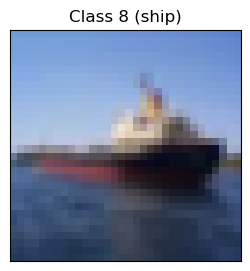

In [9]:
check_one(X_train, t_train.flatten())

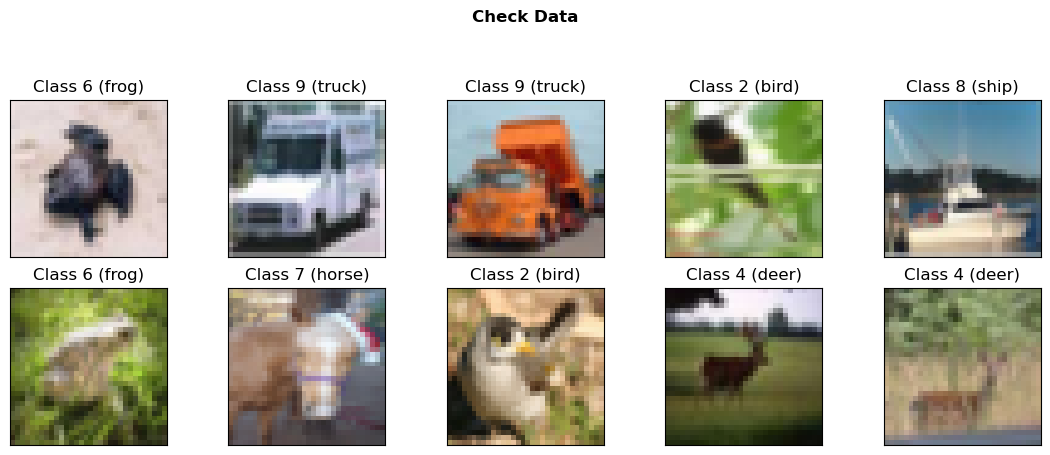

In [10]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [11]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [12]:
t_train[0]

array([6], dtype=uint8)

In [13]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 48)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 96)        41568     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 96)        83040     
                                                        

## Compile the model

In [17]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Fit the training data

In [20]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [23]:
%%time
# Fit the model on a training set
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    # epochs = 100,
    epochs = 10,
    # batch_size = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 1)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Epoch 1/10
400/400 [==============================] - 53s 133ms/step - loss: 0.6899 - accuracy: 0.7833 - val_loss: 0.6698 - val_accuracy: 0.7883
Epoch 2/10
400/400 [==============================] - 59s 148ms/step - loss: 0.6725 - accuracy: 0.7900 - val_loss: 0.7072 - val_accuracy: 0.7769
Epoch 3/10
400/400 [==============================] - 65s 164ms/step - loss: 0.6992 - accuracy: 0.7815 - val_loss: 0.7149 - val_accuracy: 0.7729
Epoch 4/10
400/400 [==============================] - 63s 158ms/step - loss: 0.6895 - accuracy: 0.7853 - val_loss: 0.7011 - val_accuracy: 0.7854
Epoch 5/10
400/400 [==============================] - 65s 163ms/step - loss: 0.6953 - accuracy: 0.7865 - val_loss: 0.6963 - val_accuracy: 0.7853
Epoch 6/10
400/400 [==============================] - 66s 166ms/step - loss: 0.6930 - accuracy: 0.7824 - val_loss: 0.7243 - val_accuracy: 0.7707
Epoch 7/10
400/400 [==============================] - 63s 159ms/step - loss: 0.6923 - accuracy: 0.7860 - val_loss: 0.7190 - val_ac

In [24]:
%%time
# Fit the model on a training set
history2 = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    # epochs = 100,
    epochs = 10,
    # batch_size = 100,
    batch_size = 50,
    callbacks = [tensorboard],
    verbose = 1)
print(f'Training accuracy:{history2.history["accuracy"][-1]:.2f} validation accuracy:{history2.history["val_accuracy"][-1]:.2f} ')

Epoch 1/10
800/800 [==============================] - 59s 72ms/step - loss: 1.0175 - accuracy: 0.6872 - val_loss: 0.9359 - val_accuracy: 0.7156
Epoch 2/10
800/800 [==============================] - 65s 82ms/step - loss: 0.9361 - accuracy: 0.7114 - val_loss: 0.8148 - val_accuracy: 0.7466
Epoch 3/10
800/800 [==============================] - 70s 87ms/step - loss: 0.9289 - accuracy: 0.7142 - val_loss: 0.8052 - val_accuracy: 0.7477
Epoch 4/10
800/800 [==============================] - 68s 85ms/step - loss: 0.9381 - accuracy: 0.7086 - val_loss: 0.8018 - val_accuracy: 0.7472
Epoch 5/10
800/800 [==============================] - 69s 86ms/step - loss: 0.9426 - accuracy: 0.7080 - val_loss: 0.9305 - val_accuracy: 0.7036
Epoch 6/10
800/800 [==============================] - 69s 86ms/step - loss: 0.9514 - accuracy: 0.7042 - val_loss: 0.8101 - val_accuracy: 0.7470
Epoch 7/10
800/800 [==============================] - 68s 85ms/step - loss: 0.9652 - accuracy: 0.7013 - val_loss: 0.8518 - val_accuracy:

In [25]:
%%time
# Fit the model on a training set
history3 = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    # epochs = 100,
    epochs = 10,
    # batch_size = 100,
    batch_size = 200,
    callbacks = [tensorboard],
    verbose = 1)
print(f'Training accuracy:{history3.history["accuracy"][-1]:.2f} validation accuracy:{history3.history["val_accuracy"][-1]:.2f} ')

Epoch 1/10
200/200 [==============================] - 60s 302ms/step - loss: 0.7791 - accuracy: 0.7570 - val_loss: 0.7241 - val_accuracy: 0.7749
Epoch 2/10
200/200 [==============================] - 61s 305ms/step - loss: 0.7231 - accuracy: 0.7747 - val_loss: 0.6974 - val_accuracy: 0.7828
Epoch 3/10
200/200 [==============================] - 64s 320ms/step - loss: 0.6752 - accuracy: 0.7873 - val_loss: 0.7095 - val_accuracy: 0.7774
Epoch 4/10
200/200 [==============================] - 69s 345ms/step - loss: 0.6443 - accuracy: 0.7966 - val_loss: 0.6769 - val_accuracy: 0.7900
Epoch 5/10
200/200 [==============================] - 69s 344ms/step - loss: 0.6406 - accuracy: 0.7984 - val_loss: 0.6706 - val_accuracy: 0.7908
Epoch 6/10
200/200 [==============================] - 63s 315ms/step - loss: 0.6215 - accuracy: 0.8033 - val_loss: 0.6858 - val_accuracy: 0.7915
Epoch 7/10
200/200 [==============================] - 62s 310ms/step - loss: 0.6089 - accuracy: 0.8062 - val_loss: 0.6783 - val_ac

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [26]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [41]:
%%time
predictions_reg = model.predict(X_test)
predictions = np.argmax(predictions_reg,axis=1)

313/313 [==============================] - 4s 14ms/step
CPU times: total: 50.6 s
Wall time: 4.66 s


## Evaluate the model

In [30]:
score = model.evaluate(X_test, y_test, batch_size = 200)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

50/50 [==============================] - 3s 64ms/step - loss: 0.6973 - accuracy: 0.7901

Test loss: 0.697250, Test accuracy: 0.790100


In [31]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [37]:
y_test_target

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [42]:
predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [43]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 841  10  24  21  15   1   3   7  57  21 
  1|   8 866   1   7   2   2   5   1  29  79 
  2|  75   2 683  68  75  15  60  10   9   3 
  3|  25   3  65 659  73  58  64  25  11  17 
  4|  13   1  36  54 809   3  30  42   6   6 
  5|  10   1  57 224  48 575  29  41   5  10 
  6|   6   2  21  55  35   2 861   2  15   1 
  7|  12   0  20  57  40  13   8 833   6  11 
  8|  58  10   5   9   4   2   5   2 889  16 
  9|  33  38   5   9   2   0   2   4  22 885 


## Visualisation of cost

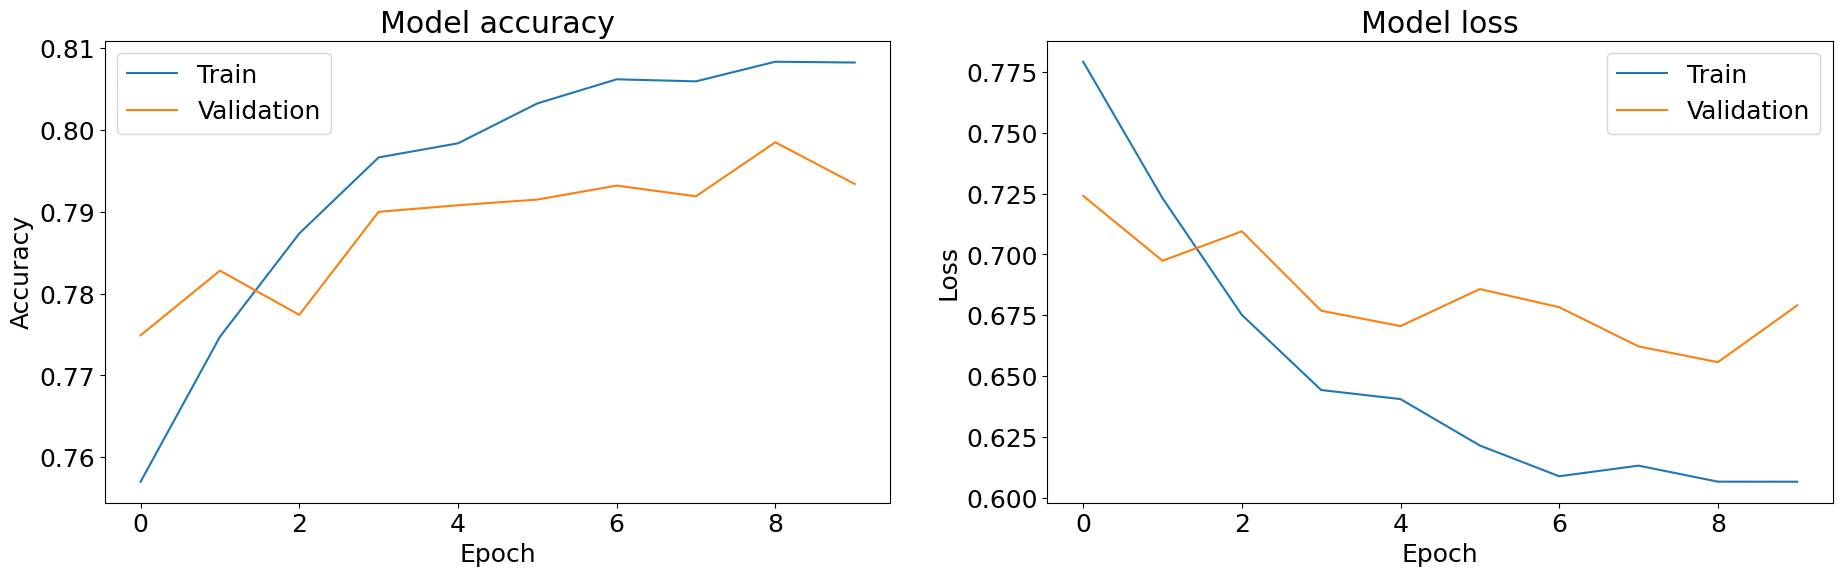

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history3.history['accuracy'])
ax[0].plot(history3.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history3.history['loss'])
ax[1].plot(history3.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

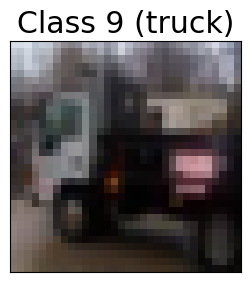

In [54]:
check_one(X_test, predictions, actual = y_test, compare = True)

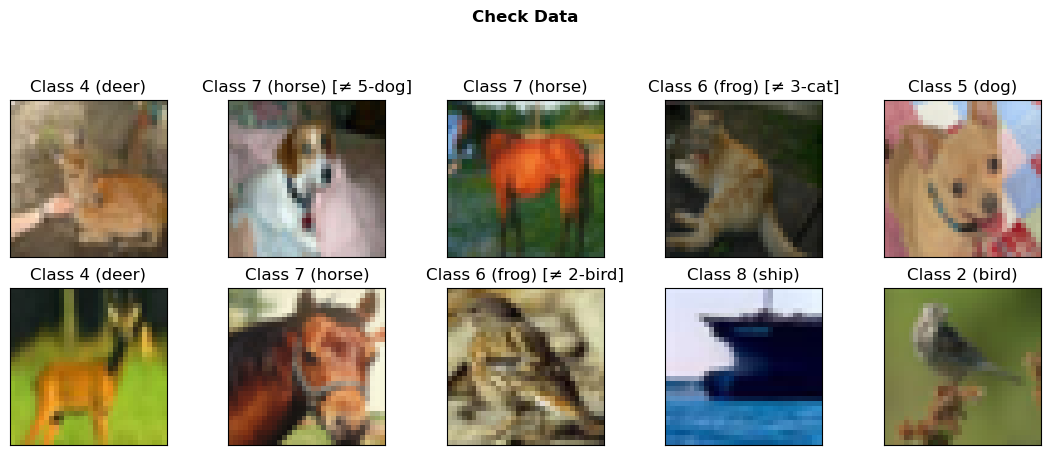

In [55]:
check_ten(X_test, predictions, y_test, True)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



